In [218]:
import numpy as np
from nilearn.datasets import fetch_atlas_msdl, fetch_atlas_aal, fetch_development_fmri, fetch_atlas_difumo
from nilearn.image import load_img
from nilearn.maskers import NiftiMapsMasker, NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn import plotting
from nilearn.interfaces.fmriprep import load_confounds_strategy

In [219]:
# Load the NIfTI file
nifti_path = '..\\..\\data\\fMRI\\fMRI\\sub-StrokeR01001S_ses-A_task-rest_dir-PA_run-1_bold.nii.gz'
fmri_img = load_img(nifti_path)
data = fmri_img.get_fdata()
# print(data)

In [220]:
# Extract time series using atlas-based parcellation
# using the msdl
atlas = fetch_atlas_msdl()
# Loading atlas image stored in 'maps'
atlas_filename = atlas["maps"]
# Loading atlas data stored in 'labels'
labels = atlas["labels"]
print(atlas_filename)
print(labels)

[get_dataset_dir] Dataset found in C:\Users\Administrator\nilearn_data\msdl_atlas
C:\Users\Administrator\nilearn_data\msdl_atlas\MSDL_rois\msdl_rois.nii
['L Aud', 'R Aud', 'Striate', 'L DMN', 'Med DMN', 'Front DMN', 'R DMN', 'Occ post', 'Motor', 'R DLPFC', 'R Front pol', 'R Par', 'R Post Temp', 'Basal', 'L Par', 'L DLPFC', 'L Front pol', 'L IPS', 'R IPS', 'L LOC', 'Vis', 'R LOC', 'D ACC', 'V ACC', 'R A Ins', 'L STS', 'R STS', 'L TPJ', 'Broca', 'Sup Front S', 'R TPJ', 'R Pars Op', 'Cereb', 'Dors PCC', 'L Ins', 'Cing', 'R Ins', 'L Ant IPS', 'R Ant IPS']


In [230]:
dim = 64
difumo = fetch_atlas_difumo(dimension=dim, resolution_mm=2, legacy_format=True)

[get_dataset_dir] Dataset found in C:\Users\Administrator\nilearn_data\difumo_atlases


In [231]:
masker_difumo = NiftiMapsMasker(
    maps_img=difumo.maps,
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    memory="nilearn_cache",
)
time_series_difumo = masker_difumo.fit_transform(fmri_img)

d:\Python313\Lib\site-packages\nilearn\maskers\base_masker.py:282: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  return self.transform_single_imgs(


In [ ]:
masker = NiftiMapsMasker(
    maps_img=difumo.maps,
    standardize="zscore_sample",
    standardize_confounds=True,
    memory="nilearn_cache",
    verbose=5,
)
masker.fit(fmri_img)
time_series = masker.transform(fmri_img)

[NiftiMapsMasker.fit] loading regions from None
[NiftiMapsMasker.wrapped] Resampling maps
[Memory]0.0s, 0.0min    : Loading resample_img...


d:\Python313\Lib\site-packages\nilearn\maskers\base_masker.py:282: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  return self.transform_single_imgs(


________________________________________resample_img cache loaded - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x000002220B77A570>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x000002220BA65150>, 
{ 'allow_overlap': True,
  'clean_kwargs': {},
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'keep_masked_maps': True,
  'low_pass': None,
  'maps_img': 'C:\\Users\\Administrator\\nilearn_data\\msdl_atlas\\MSDL_rois\\msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': 'zscore_sample',
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache\joblib), memory_level=1, verbose=5)
[Nifti

In [232]:
report = masker_difumo.generate_report(displayed_maps=[2, 6, 7, 16, 21])
report

d:\Python313\Lib\site-packages\nilearn\image\resampling.py:867: UserWarning: Casting data from int32 to float32
  return resample_img(
d:\Python313\Lib\site-packages\nilearn\image\resampling.py:867: UserWarning: Casting data from int32 to float32
  return resample_img(
d:\Python313\Lib\site-packages\nilearn\image\resampling.py:867: UserWarning: Casting data from int32 to float32
  return resample_img(
d:\Python313\Lib\site-packages\nilearn\image\resampling.py:867: UserWarning: Casting data from int32 to float32
  return resample_img(
d:\Python313\Lib\site-packages\nilearn\image\resampling.py:867: UserWarning: Casting data from int32 to float32
  return resample_img(
d:\Python313\Lib\site-packages\nilearn\plotting\html_document.py:103: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn(


In [233]:
print("Time series shape:", time_series_difumo.shape)

Time series shape: (400, 64)


(64, 64)


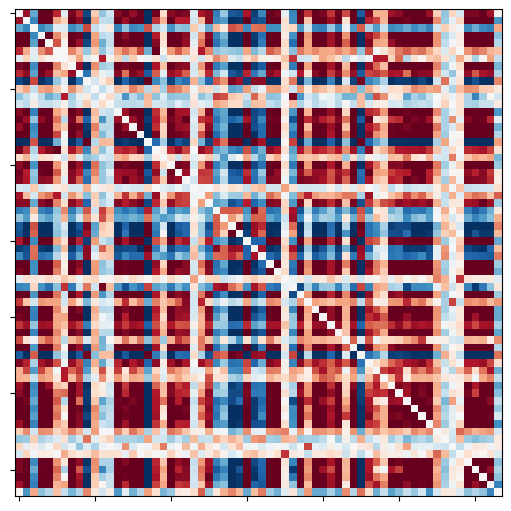

In [238]:
correlation_measure = ConnectivityMeasure(
    kind="correlation",
    standardize="zscore_sample",
)
correlation_measure_difumo = ConnectivityMeasure(
    kind="correlation",
    standardize="zscore_sample",
)
correlation_matrix = correlation_measure.fit_transform([time_series])[0]
correlation_matrix_difumo = correlation_measure_difumo.fit_transform([time_series_difumo])[0]

# Display the correlation matrix
labels_difumo = difumo['labels']
# Mask out the major diagonal
np.fill_diagonal(correlation_matrix_difumo, 0)
plotting.plot_matrix(
    correlation_matrix_difumo, labels=None, colorbar=None, vmax=0.8, vmin=-0.8, 
)
print(correlation_matrix_difumo.shape)

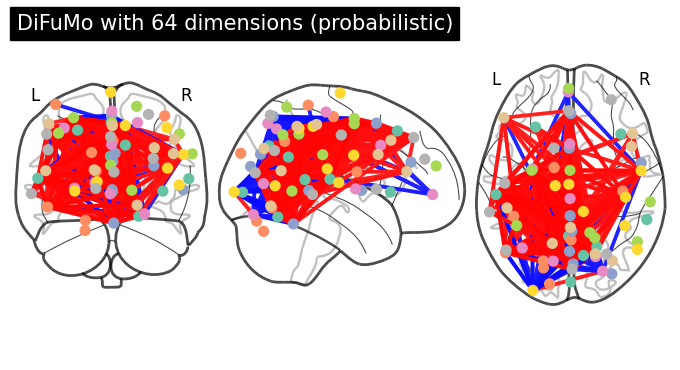

In [239]:
coordinates = plotting.find_probabilistic_atlas_cut_coords(
    maps_img=difumo.maps
)

# plot connectome with 85% edge strength in the connectivity
plotting.plot_connectome(
    correlation_matrix_difumo,
    coordinates,
    edge_threshold="85%",
    title=f"DiFuMo with {dim} dimensions (probabilistic)",
)
plotting.show()

In [240]:
view = plotting.view_connectome(
    correlation_matrix_difumo, coordinates, edge_threshold="80%"
)
view

d:\Python313\Lib\site-packages\nilearn\plotting\html_document.py:103: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn(
